In [2]:
# Import Dependencies

import pandas as pd
import numpy as np

data = pd.read_csv('austin_weather.csv')

# DATA CLEANING
# Drop unnecessary columns
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'], axis=1)
data = data.replace('T', 0.0)
data = data.replace('-', 0.0)

# Save the data in a CSV file
data.to_csv('austin_final.csv')

In [5]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_csv('austin_final.csv')
X = data.drop(['PrecipitationSumInches'], axis=1)
Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1,1)

      Unnamed: 0  TempHighF  TempAvgF  TempLowF  DewPointHighF  DewPointAvgF  \
0              0         74        60        45           67.0          49.0   
1              1         56        48        39           43.0          36.0   
2              2         58        45        32           31.0          27.0   
3              3         61        46        31           36.0          28.0   
4              4         58        50        41           44.0          40.0   
5              5         57        48        39           39.0          36.0   
6              6         60        53        45           41.0          39.0   
7              7         62        51        40           43.0          39.0   
8              8         64        50        36           49.0          41.0   
9              9         44        40        35           31.0          26.0   
10            10         55        46        36           31.0          28.0   
11            11         69        54   

In [7]:
clf = LinearRegression()
clf.fit(X,Y)

inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45], [57], 
                [29.68],[10],[7],[2],[0],[20],[4],[31]])

inp = inp.reshape(1,-1)
print('The precipitation in inches for the input is:', clf.predict(inp))

The precipitation in inches for the input is: [[1.33868402]]


The precipitation trend graph: 


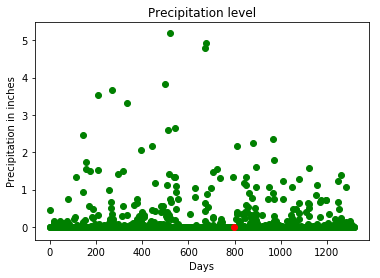

In [9]:
day_index = 798
days = [i for i in range(Y.size)]
print('The precipitation trend graph: ')

plt.scatter(days, Y, color='g')
plt.scatter(days[day_index], Y[day_index],color='r')
plt.title('Precipitation level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')

# Plot a graph of precipitation levels vs no. of days
plt.show()

Precipitation vs Selected Attributes Graph: 


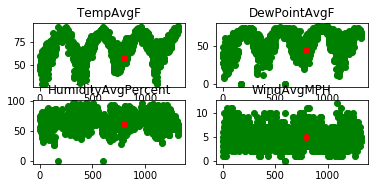

In [12]:
x_f = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches'
               'VisibilityAvgMiles', 'WindAvgMPH'], axis=1)

print('Precipitation vs Selected Attributes Graph: ')

for i in range(x_f.columns.size):
    plt.subplot(3, 2, i+1)
    plt.scatter(days, x_f[x_f.columns.values[i][:100]], color='g')
    plt.scatter(days[day_index], x_f[x_f.columns.values[i]][day_index], color='r')
    plt.title(x_f.columns.values[i])
    
    
# Plot a graph with a few features vs precipitation to observe trends
plt.show()